# Iris data

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# load iris data, split in
iris = load_iris()
X = iris.data
y = iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 1, stratify=iris.target)

# Create and Train DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

## model fitting

### default

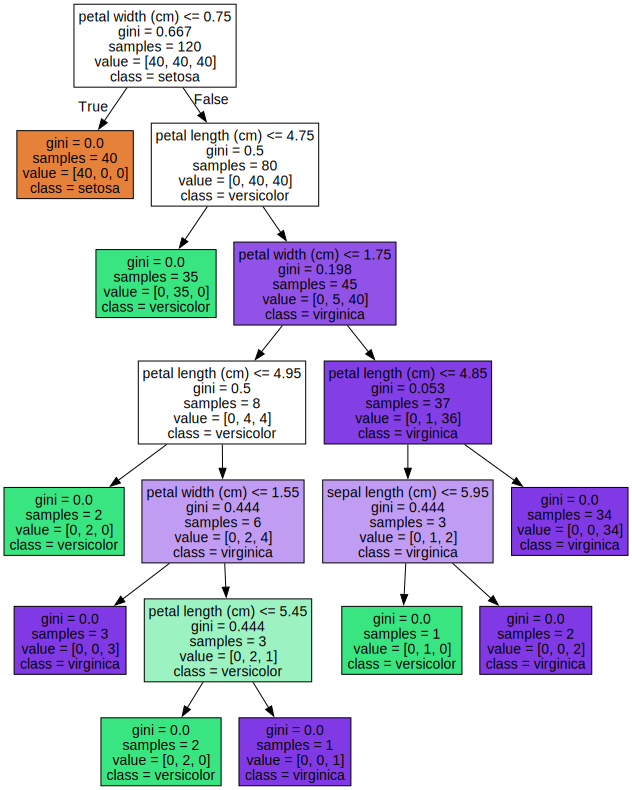

In [7]:
from sklearn.tree import export_graphviz
import graphviz

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris.target_names,
                           feature_names=iris.feature_names,
                           impurity=True, filled=True)
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [9]:
train_score = dt_clf.score(X_train, y_train)
test_score = dt_clf.score(X_test, y_test)

print(f"train_score: {train_score:.5f}")
print(f"test_score: {test_score:.5f}")

train_score: 1.00000
test_score: 0.96667


### max_depth = 3

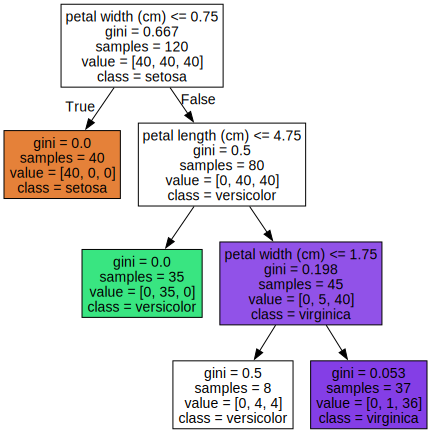

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

dt_md3 = DecisionTreeClassifier(max_depth=3)
dt_md3.fit(X_train, y_train)

export_graphviz(dt_md3, out_file='tree.dot', class_names=iris.target_names,
                           feature_names=iris.feature_names,
                           impurity=True, filled=True)
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [10]:
train_score = dt_md3.score(X_train, y_train)
test_score = dt_md3.score(X_test, y_test)

print(f"train_score: {train_score:.5f}")
print(f"test_score: {test_score:.5f}")

train_score: 0.95833
test_score: 0.96667


### min_samples_split=4

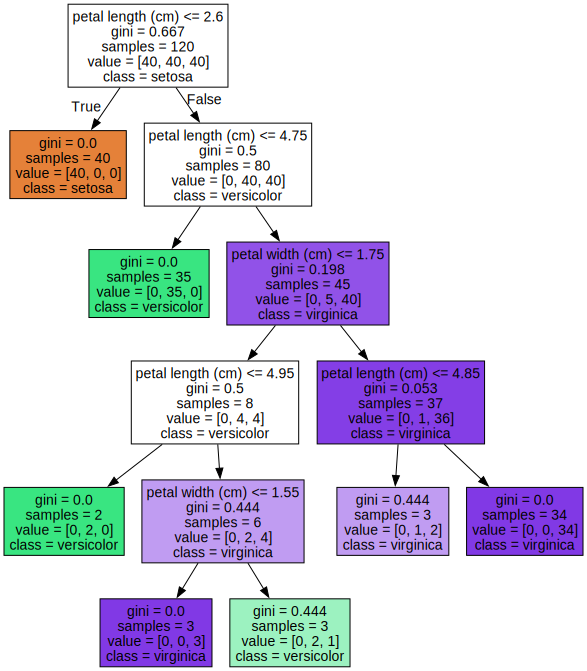

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

dt_ms4 = DecisionTreeClassifier(min_samples_split=4)
dt_ms4.fit(X_train, y_train)

export_graphviz(dt_ms4, out_file='tree.dot', class_names=iris.target_names,
                           feature_names=iris.feature_names,
                           impurity=True, filled=True)
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [11]:
train_score = dt_ms4.score(X_train, y_train)
test_score = dt_ms4.score(X_test, y_test)

print(f"train_score: {train_score:.5f}")
print(f"test_score: {test_score:.5f}")

train_score: 0.98333
test_score: 0.96667


### min_samples_leaf=4

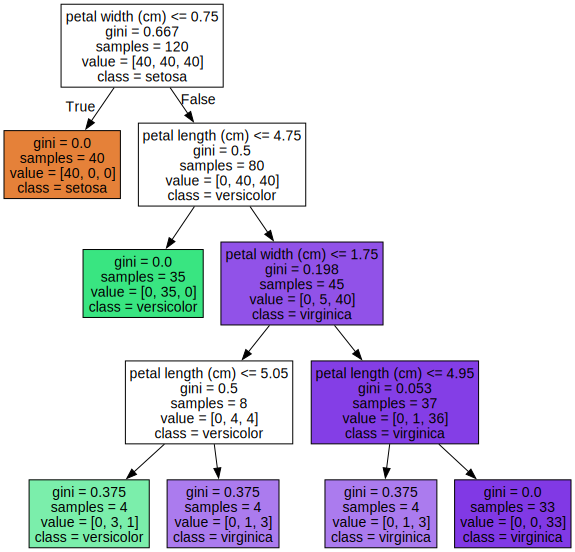

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

dt_msl4 = DecisionTreeClassifier(min_samples_leaf=4)
dt_msl4.fit(X_train, y_train)

export_graphviz(dt_msl4, out_file='tree.dot', class_names=iris.target_names,
                           feature_names=iris.feature_names,
                           impurity=True, filled=True)
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [12]:
train_score = dt_msl4.score(X_train, y_train)
test_score = dt_msl4.score(X_test, y_test)

print(f"train_score: {train_score:.5f}")
print(f"test_score: {test_score:.5f}")

train_score: 0.97500
test_score: 0.96667


## visualization

Feature importance:
[0.017 0.    0.43  0.553]
sepal length (cm): 0.017
sepal width (cm): 0.000
petal length (cm): 0.430
petal width (cm): 0.553


<Axes: >

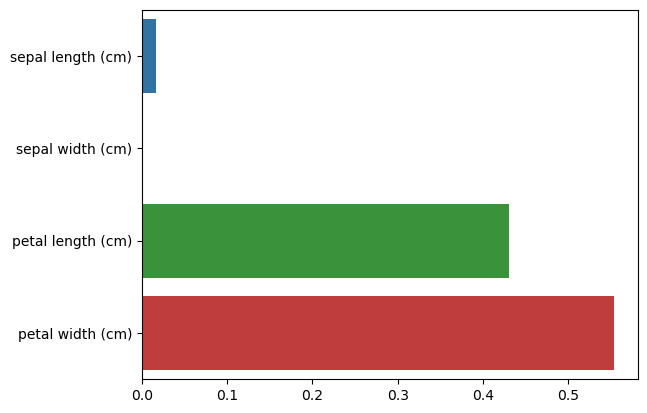

In [13]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print(f"Feature importance:\n{np.round(dt_clf.feature_importances_, 3)}")

# map importance per feature
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print(f'{name}: {value:.3f}')
    
# visualize the feature importance by column
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

# Feature importance:
# [0.017 0.    0.43  0.553]
# sepal length (cm): 0.017
# sepal width (cm): 0.000
# petal length (cm): 0.430
# petal width (cm): 0.553

# Overfitting

### default

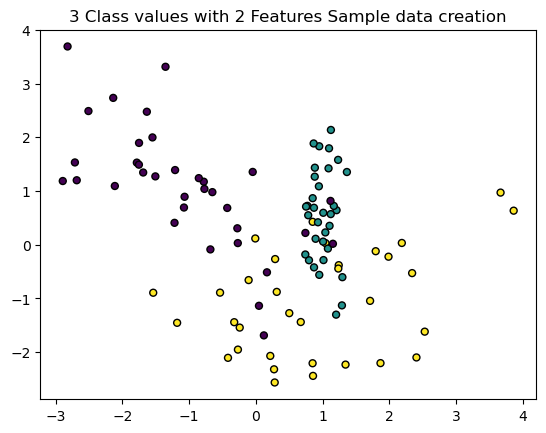

In [3]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolors='k')

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_boundary(clf, X, y):
    # Plot decision boundary
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30, edgecolors='k', linewidths=0.5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.colorbar()
    plt.show()


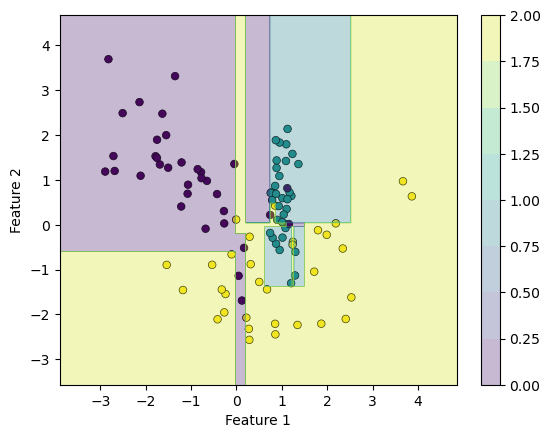

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### min_samples_leaf = 6

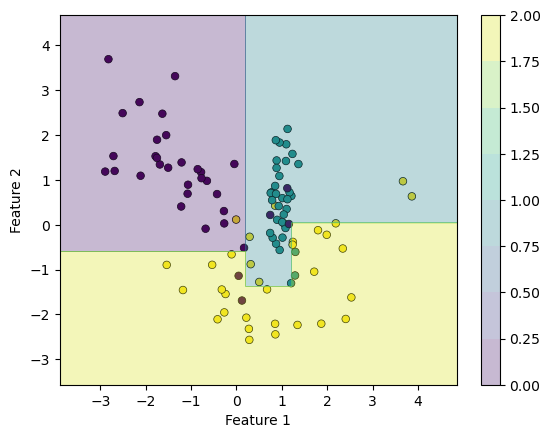

In [9]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)